In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

df=pd.read_csv('municipality_bus_utilization.csv')
df

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019
...,...,...,...,...
13065,2017-08-19 16:30:35,2,548,697
13066,2017-08-19 16:30:35,8,1193,2947
13067,2017-08-19 16:30:35,7,1354,2019
13068,2017-08-19 16:30:35,6,1680,3113


In [35]:
df['timestamp']=pd.to_datetime(df['timestamp'],infer_datetime_format=True)
boundary_date=datetime.datetime(2017,8,5)
df_test=df.loc[(df['timestamp'] >= boundary_date)]
df_train=df.loc[(df['timestamp'] < boundary_date)]
data={'train':df_train,'test':df_test}

<ipython-input-40-26075ee70b26>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


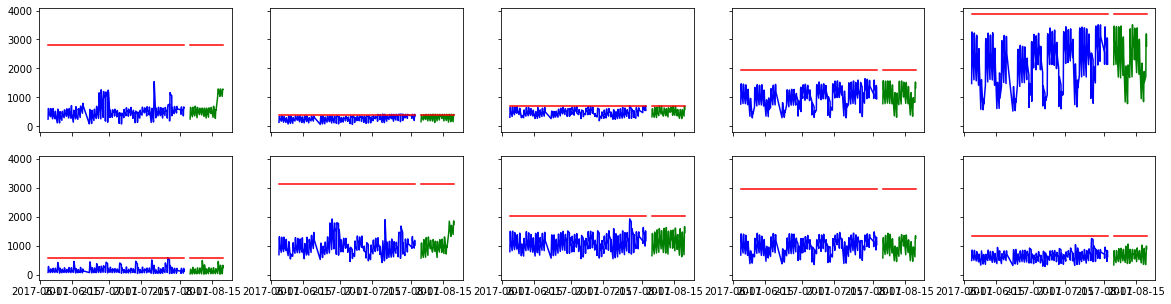

In [40]:
municipalities=[]

for i in range (0,10):
    municipality={}
    for key in ['train','test']:
        dataset=data[key]
        municipality[key]=dataset.loc[dataset['municipality_id']==i]
        # Because a row is added every 30min and we need only hourly data, we take the maximum of every two rows
        municipality[key]=municipality[key].sort_values(by=['timestamp'])
        municipality[key]=municipality[key].groupby(np.arange(len(municipality[key]))//2).max()
    municipalities.append(municipality)


# Plot each municipality dataframe
fig1_grid=(2,5)
fig1, axs = plt.subplots(*fig1_grid, sharex=True, sharey=True,figsize=(20,5))
for row in range(0,fig1_grid[0]):
    for col in range(0,fig1_grid[1]):
        i=col+fig1_grid[1]*row
        municipality=municipalities[i]
        axs[row,col].plot(municipality['train']['timestamp'],municipality['train']['usage'],color='b')
        axs[row,col].plot(municipality['train']['timestamp'],municipality['train']['total_capacity'],color='r')
        axs[row,col].plot(municipality['test']['timestamp'],municipality['test']['usage'],color='g')
        axs[row,col].plot(municipality['test']['timestamp'],municipality['test']['total_capacity'],color='r')
fig1.show()

### Possible Solutions ###
ARIMA models. pmdarima is a Python lib that implements the ARIMA models from R. Follow this tutorial: https://towardsdatascience.com/mastering-time-series-analysis-in-python-8219047a0351

NBEATS model. NBEATS is a RNN model. See https://pytorch-forecasting.readthedocs.io/en/latest/tutorials/ar.html

Manually specifying a probabilistic model with Stan. This would be my favorite as we know what each variable within our model stands for. See https://faculty.ai/tech-blog/a-short-introduction-to-stan/